In [1]:
import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
from keras.preprocessing import image

In [2]:
train_gen = image.ImageDataGenerator(rescale=1./255)
test_gen = image.ImageDataGenerator(rescale=1./255)

In [3]:
train_data = train_gen.flow_from_directory(directory="train_test_Data/Train",target_size=(300,300),batch_size=32,classes=[chr(i) for i in range(65,91)])  

Found 3640 images belonging to 26 classes.


In [4]:
train_data.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [6]:
test_data = test_gen.flow_from_directory(directory="train_test_Data/Test",target_size=(300,300),batch_size=32,classes=[chr(i) for i in range(65,91)])

Found 1560 images belonging to 26 classes.


In [7]:
test_data.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [8]:
# CNN Model 
model = Sequential() 

# Convolutional Layer with input shape (300,300,3)
model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(300,300,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units=26, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 296, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 71, 71, 128)       7

In [9]:
model.fit(train_data,steps_per_epoch = 2,epochs = 26)

Epoch 1/26
2/2 [==============================] - 16s 7s/step - loss: 5.6262 - accuracy: 0.0469
Epoch 2/26
2/2 [==============================] - 9s 4s/step - loss: 4.1120 - accuracy: 0.1094
Epoch 3/26
2/2 [==============================] - 9s 4s/step - loss: 3.2429 - accuracy: 0.0312
Epoch 4/26
2/2 [==============================] - 9s 5s/step - loss: 3.3299 - accuracy: 0.0781
Epoch 5/26
2/2 [==============================] - 9s 4s/step - loss: 3.2446 - accuracy: 0.0625
Epoch 6/26
2/2 [==============================] - 9s 4s/step - loss: 3.2558 - accuracy: 0.0625
Epoch 7/26
2/2 [==============================] - 9s 4s/step - loss: 3.2565 - accuracy: 0.0781
Epoch 8/26
2/2 [==============================] - 9s 4s/step - loss: 3.2188 - accuracy: 0.0938
Epoch 9/26
2/2 [==============================] - 9s 4s/step - loss: 3.1314 - accuracy: 0.1406
Epoch 10/26
2/2 [==============================] - 9s 4s/step - loss: 3.1544 - accuracy: 0.1094
Epoch 11/26
2/2 [==============================]

In [10]:
accuracy = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy*100} %")

C:\Users\Ayesha Thabassum\AppData\Local\Temp\ipykernel_14460\1114248660.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy = model.evaluate_generator(generator= test_data)[1]


The accuracy of the model is = 79.10256385803223 %


1/1 [==============================] - 0s 135ms/step
E


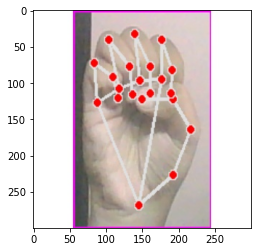

In [82]:
'''import numpy as np
import keras.utils as ku
import matplotlib.pyplot as plt

def Recog(path):
    # Loading Image
    img = ku.load_img(path, target_size=(300,300))
    # Normalizing Image
    norm_img = ku.img_to_array(img)/255
    # Converting Image to Numpy Array
    input_arr_img = np.array([norm_img])
    imgplot = plt.imshow(img)
    # Getting Predictions
    pred = model.predict(input_arr_img)
    # Printing Model Prediction
    l=list(pred[0])
    return l
    
# Path for the image to get predictions  
path = "C:/Users/User/OneDrive/Desktop/Miniprj/Data_Images/E/image_45.jpg"
ans = Recog(path)
print(chr(65+ans.index(max(ans))))
'''

In [11]:
model.save("ASL_c_Recog_model.h5")